# Fashion Clasifications

In this exercise, we are using **Fashion MNIST Data Set**. This data set contain:
* 70K image of clothing
* 10 Categories
* Each image are 28x28
* Each pixel-value is an integer between 0 and 255
* Using numbers for labeling each image
* Can train a neural net!


## Load training and testing data

In this model, we will use 60K image data to train the network and 10K image data to test our model.

* train_images/test_images : data image
* train_labels/test_labels : label of each image

Label | Description
--- | ---
0 | T-shirt/top
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandal
6 | Sirt
7 | Sneaker
8 | Bag
9 | Ankle boot

In [1]:
import tensorflow as tf


mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Plot data images

3
[[  0   0   0   0   0   1   0   0   0  65  99   0   0   0   0   0   0   0
  106  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  17 190 206 202 145 148 146 148 166 165 189
  212 210 202   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 160 229 193 189 197 169 182 109 165 156 202
  198 196 233  96   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2 199 198 213 193 201 207 196 172 211 206 207
  200 202 208 217   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 205 200 207 190 192 210 210 208 212 208 197
  201 210 206 205  83   0   0   0   0   0]
 [  0   0   0   0   0   2 196 220 200 200 190 193 199 222 222 225 199 198
  210 212 218 227 189   0   0   0   0   0]
 [  0   0   0   0   0   0   0 162 215 199 192 196 195 204 221 200 195 205
  208 218 235 170   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 172 240 192 204 203 206 203 199 206 215
  211 232 114   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0  32 235 200 206 208 205 

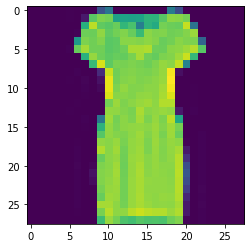

In [2]:
import matplotlib.pyplot as plt

plt.imshow(training_images[20])
print(training_labels[20])
print(training_images[20])

## Normalazing

The values in the number are between 0 and 255. The training process will easier if we treat all values as between 0 and 1.

In [3]:
training_images = training_images / 255.0
test_images = test_images / 255.0

3
[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.25490196 0.38823529 0.
  0.         0.         0.         0.         0.         0.
  0.41568627 0.23529412 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00392157
  0.         0.06666667 0.74509804 0.80784314 0.79215686 0.56862745
  0.58039216 0.57254902 0.58039216 0.65098039 0.64705882 0.74117647
  0.83137255 0.82352941 0.79215686 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.62745098 0.89803922 0.75686275 0.74117647 0.77254902
  0.6627451  0.71372549 0.42745098 0.64705882 0.61176471 0.79215686
  0.77647059 0.76862745 0.91372549 0.37647059 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.78039216 0.776

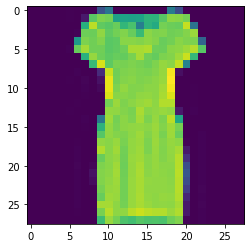

In [4]:
plt.imshow(training_images[20])
print(training_labels[20])
print(training_images[20])

## Making model

we will make 3 layers of NN. The first layer is the input layer. The second layer is the hidden layer, this layer will try to figure out the role between the input layer & output layer. The last is the output layer.

In [5]:
model  = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

* `Sequential`: That defines a sequence of layers in the neural network
* `Flatten`: That turns the data set into a 1-dimensional set
* `Dense`: Adds a layer of neurons, each layer needs an **activation function** to tell the neurons what to do
* `Relu`: "if x>0 retuurn x, else return 0"
* `softmax`: Takes a set of values, and picks the biggest one.

## Compiling & training

In [6]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5853 - accuracy: 0.7964
Epoch 2/6
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3643 - accuracy: 0.8648
Epoch 3/6
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3224 - accuracy: 0.8806
Epoch 4/6
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2970 - accuracy: 0.8893
Epoch 5/6
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2812 - accuracy: 0.8962
Epoch 6/6
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2631 - accuracy: 0.9012


## Testing

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3298 - accuracy: 0.8855


[0.32982078194618225, 0.8855000138282776]

## Clasifications

In [8]:
classifications = model.predict(test_images)
print(classifications[0])

[2.0735778e-09 3.5358565e-09 1.9456355e-10 1.9273813e-11 9.5606877e-11
 7.5811893e-04 2.0232498e-09 8.2178172e-03 8.2251544e-10 9.9102414e-01]


The output of this model is a list of 10 numbers. The numbers are a probability that this item is each of 10 classes. 

The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot.


9


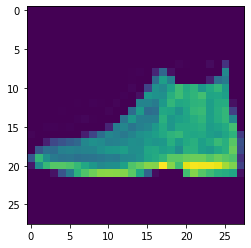

In [9]:
print(test_labels[0])
plt.imshow(test_images[0])

## Using callbacks to control training

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

model  = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5783 - accuracy: 0.7981
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3665 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3260 - accuracy: 0.8800
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2988 - accuracy: 0.8890
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2722 - accuracy: 0.9011
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2588 - accuracy: 0.9038
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2509 - accuracy: 0.9055
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2365 - accuracy: 0.9109
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2274 - accuracy: 0.9136
Epoch 10/10
1875/1875 [==============================] - 24s 13ms/step

In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3506 - accuracy: 0.8765


[0.3505660891532898, 0.8765000104904175]